 # FashionMNIST

 ## Задание 7.2

<img src="https://emiliendupont.github.io/imgs/mnist-chicken/mnist-and-fashion-examples.png">

In [ ]:

from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Lambda
import keras
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd

In [ ]:
def normalize(x):
  return x / 255

## Load

In [ ]:
rows = 28
cols = 28
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))


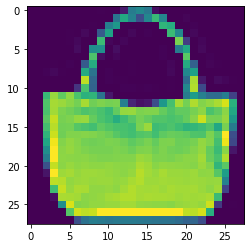

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[100])

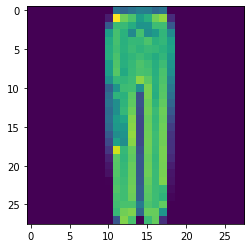

In [ ]:
plt.imshow(x_train[1000])

In [ ]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test=keras.utils.to_categorical(y_test,10)
x_train = x_train.reshape(x_train.shape[0], rows, cols, 1)
x_test = x_test.reshape(x_test.shape[0], rows, cols, 1)

## Augmentation

In [ ]:
batch_size = 256

## MLP

In [ ]:
model1 = Sequential([
                     Lambda(normalize, input_shape = (rows, cols, 1)),
                     Flatten(input_shape = (rows, cols, 1)),
                     Dense(units = 256, activation='relu'),
                     
                     Dense(units = 128, activation = 'relu'),
                     Dense(units = 10, activation='softmax')])

In [ ]:
model1.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, 28, 28, 1)         0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history1 = model1.fit(x_train, y_train,
           epochs=30,
           batch_size=batch_size,
           validation_data=(x_test, y_test))

Epoch 1/30
235/235 [==============================] - 3s 4ms/step - loss: 0.7711 - accuracy: 0.7344 - val_loss: 0.4570 - val_accuracy: 0.8393
Epoch 2/30
235/235 [==============================] - 1s 3ms/step - loss: 0.3994 - accuracy: 0.8559 - val_loss: 0.3888 - val_accuracy: 0.8645
Epoch 3/30
235/235 [==============================] - 1s 3ms/step - loss: 0.3407 - accuracy: 0.8772 - val_loss: 0.3831 - val_accuracy: 0.8644
Epoch 4/30
235/235 [==============================] - 1s 3ms/step - loss: 0.3130 - accuracy: 0.8865 - val_loss: 0.3771 - val_accuracy: 0.8598
Epoch 5/30
235/235 [==============================] - 1s 3ms/step - loss: 0.3005 - accuracy: 0.8901 - val_loss: 0.3476 - val_accuracy: 0.8744
Epoch 6/30
235/235 [==============================] - 1s 3ms/step - loss: 0.2787 - accuracy: 0.8972 - val_loss: 0.3376 - val_accuracy: 0.8759
Epoch 7/30
235/235 [==============================] - 1s 3ms/step - loss: 0.2645 - accuracy: 0.9023 - val_loss: 0.3345 - val_accuracy: 0.8791
Epoch 

## CNN

In [ ]:
model2 = Sequential([
    Lambda(normalize, input_shape = (rows, cols, 1)),
    Conv2D(32,
           kernel_size=(3, 3),
           activation='relu',
           input_shape=(rows, cols, 1)),
    BatchNormalization(),

    Conv2D(32,
           kernel_size=(3, 3),
           activation='relu'),    
    BatchNormalization(),
    Dropout(0.25),

    Conv2D(64,
           kernel_size=(3, 3),
           activation='relu'),    
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    
    Conv2D(128,
           kernel_size=(3, 3),
           activation='relu'),    
    BatchNormalization(),
    Dropout(0.25),

    Flatten(),

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    
    Dense(10, activation='softmax') 
])

In [ ]:
model2.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

In [ ]:
history2 = model2.fit(x_train, y_train,
           epochs=30,
           batch_size=batch_size,
           validation_data=(x_test, y_test))

Epoch 1/30
235/235 [==============================] - 12s 27ms/step - loss: 0.8364 - accuracy: 0.7239 - val_loss: 2.7441 - val_accuracy: 0.2469
Epoch 2/30
235/235 [==============================] - 6s 26ms/step - loss: 0.3745 - accuracy: 0.8647 - val_loss: 0.4751 - val_accuracy: 0.8390
Epoch 3/30
235/235 [==============================] - 6s 26ms/step - loss: 0.2940 - accuracy: 0.8942 - val_loss: 0.3381 - val_accuracy: 0.8790
Epoch 4/30
235/235 [==============================] - 6s 26ms/step - loss: 0.2601 - accuracy: 0.9067 - val_loss: 0.2381 - val_accuracy: 0.9167
Epoch 5/30
235/235 [==============================] - 6s 26ms/step - loss: 0.2393 - accuracy: 0.9135 - val_loss: 0.2420 - val_accuracy: 0.9139
Epoch 6/30
235/235 [==============================] - 6s 26ms/step - loss: 0.2228 - accuracy: 0.9199 - val_loss: 0.2193 - val_accuracy: 0.9205
Epoch 7/30
235/235 [==============================] - 6s 26ms/step - loss: 0.2050 - accuracy: 0.9272 - val_loss: 0.2424 - val_accuracy: 0.910

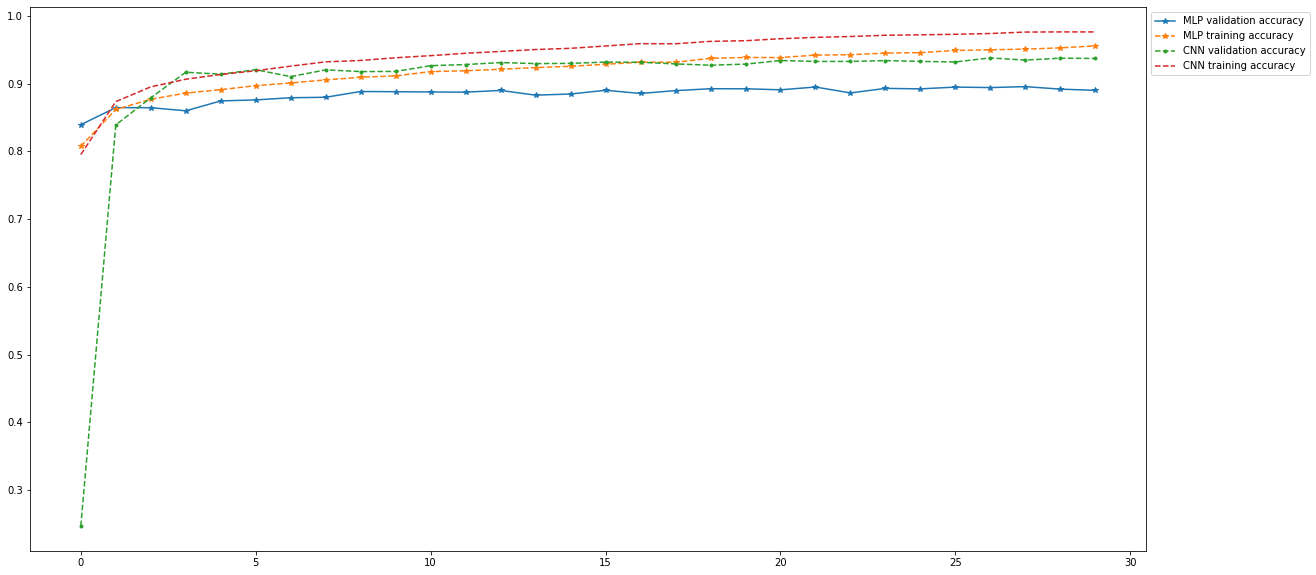

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(history1.history['val_accuracy'], '-*', label='MLP validation accuracy')
plt.plot(history1.history['accuracy'], '--*', label='MLP training accuracy')
plt.plot(history2.history['val_accuracy'], '--.', label='CNN validation accuracy')
plt.plot(history2.history['accuracy'], '--', label='CNN training accuracy')
plt.legend(bbox_to_anchor=(1, 1));

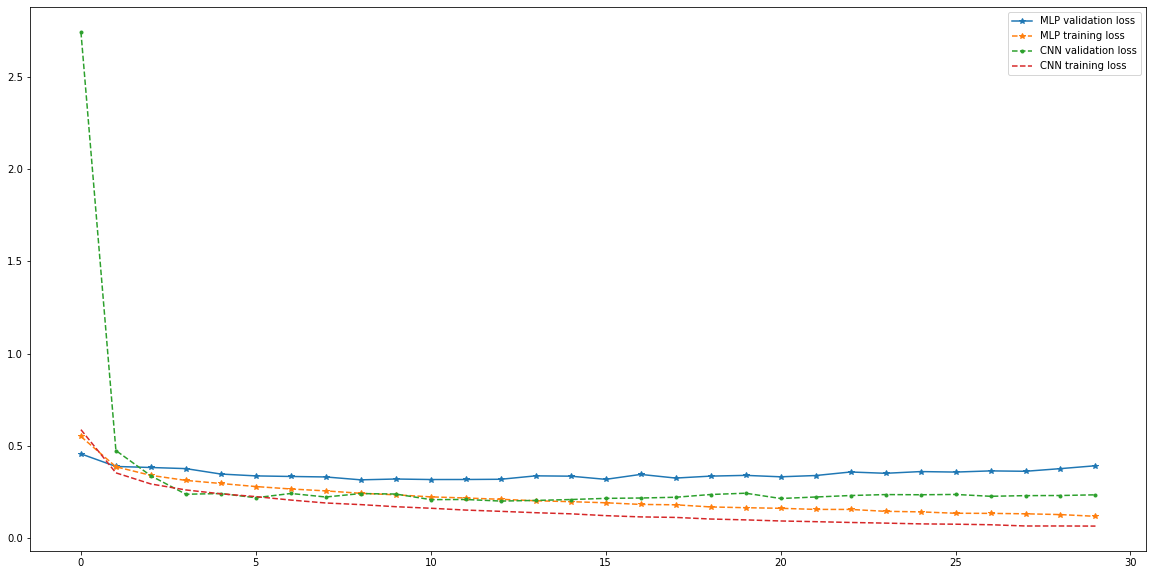

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(history1.history['val_loss'], '-*', label='MLP validation loss')
plt.plot(history1.history['loss'], '--*', label='MLP training loss')
plt.plot(history2.history['val_loss'], '--.', label='CNN validation loss')
plt.plot(history2.history['loss'], '--', label='CNN training loss')
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
pred_mlp = np.argmax(model1.predict(x_test), axis=1)
pred_cnn = np.argmax(model2.predict(x_test), axis=1)


In [ ]:
m1 = confusion_matrix(y_test.argmax(axis=1), pred_mlp)
m2 = confusion_matrix(y_test.argmax(axis=1), pred_cnn)
print('confusion mlp')
print(m1)
print('confusion cnn')
print(m2)

confusion mlp
[[795   0  12  28   3   0 158   0   4   0]
 [  3 975   2  12   5   0   2   0   1   0]
 [ 21   1 804  12  58   0 103   0   1   0]
 [ 13   2  12 911  28   0  31   0   3   0]
 [  0   0 100  35 780   0  83   0   2   0]
 [  0   0   0   2   0 957   0  28   0  13]
 [ 85   0  60  27  42   0 783   0   3   0]
 [  0   0   0   0   0   6   0 977   0  17]
 [  5   0   2   7   1   4  14   4 963   0]
 [  0   0   0   0   0   4   1  40   0 955]]
confusion cnn
[[880   0  16  10   3   1  84   0   6   0]
 [  1 991   0   6   0   0   0   0   2   0]
 [ 11   1 899   8  33   0  48   0   0   0]
 [  4   3   7 942  26   0  18   0   0   0]
 [  1   0  21  15 929   0  34   0   0   0]
 [  0   0   0   0   0 981   0  13   1   5]
 [ 67   0  31  21  60   0 813   0   8   0]
 [  0   0   0   0   0   2   0 989   0   9]
 [  3   0   2   3   3   1   1   1 986   0]
 [  1   0   0   0   0   3   1  34   0 961]]
